<a href="https://colab.research.google.com/github/GAYATRI141/my_first_repo/blob/main/Assignment_14_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [ ]:
df = pd.read_csv("Fraud_check.csv")

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [ ]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [ ]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [ ]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


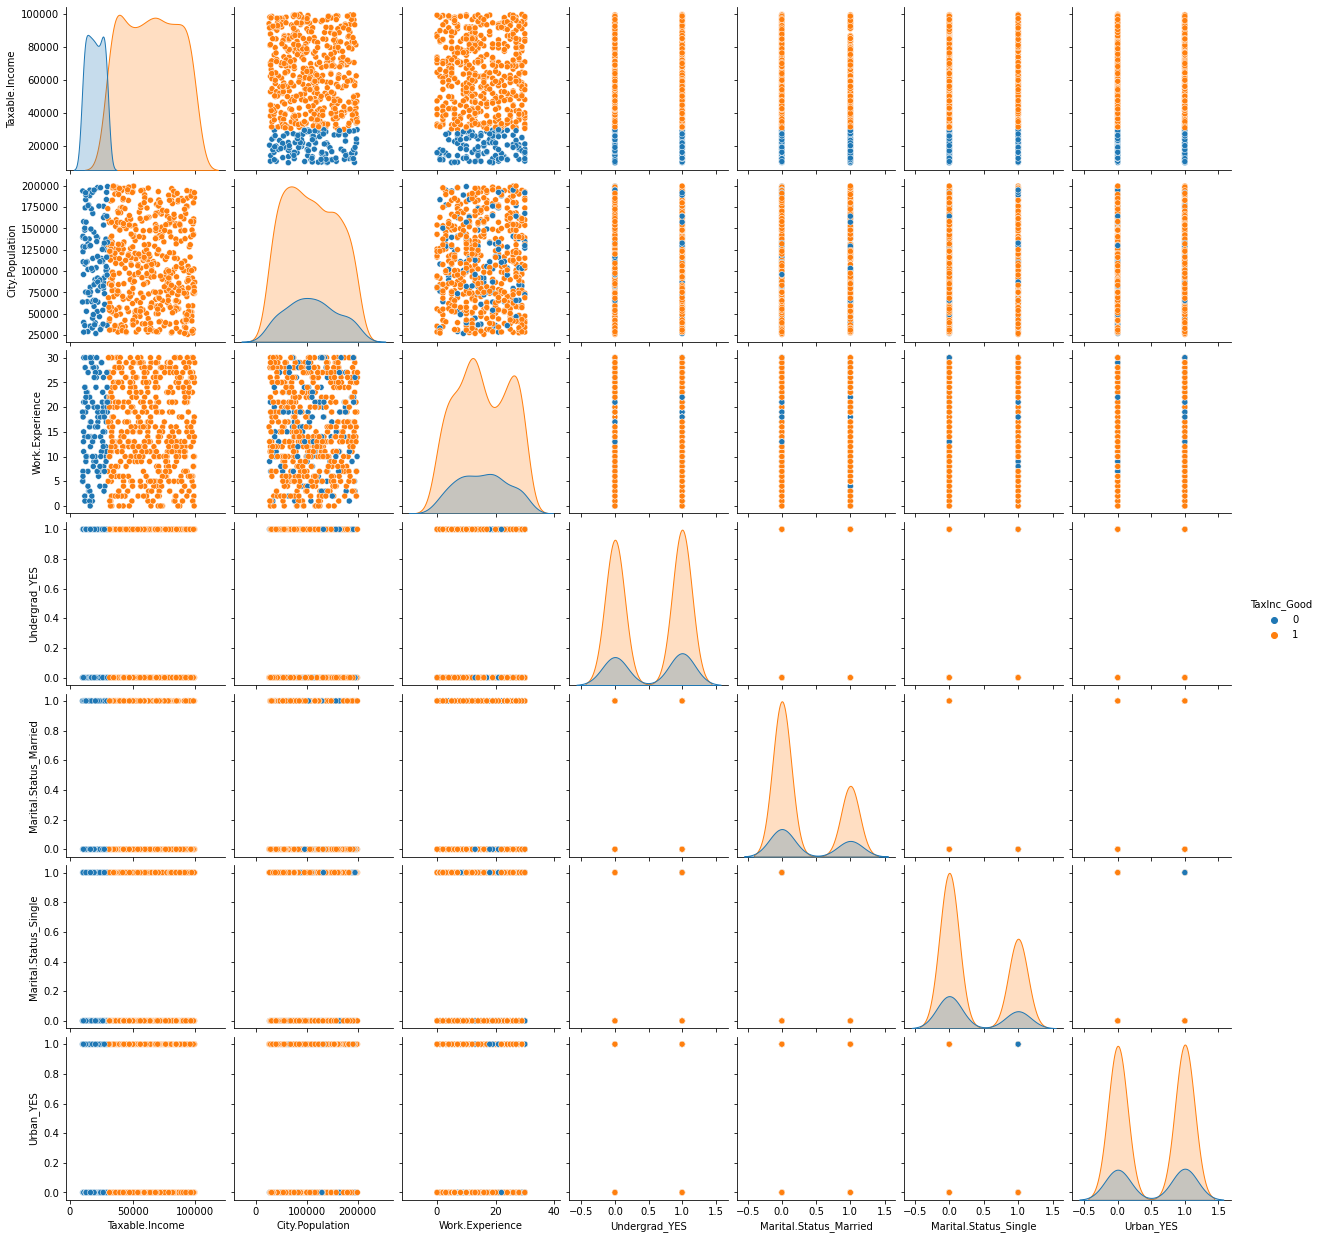

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [ ]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [ ]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [ ]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [ ]:
model.n_outputs_

1

In [ ]:
model.oob_score_
###74.7833%

0.525

In [ ]:
##Predictions on train data
prediction = model.predict(x_train)

In [ ]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [ ]:
np.mean(prediction == y_train)
##98.33%

0.9895833333333334

In [ ]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
##Prediction on test data
pred_test = model.predict(x_test)

In [ ]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

#Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree

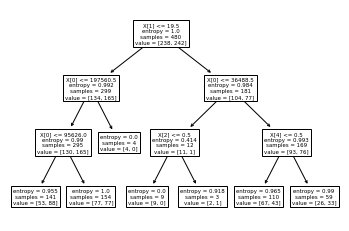

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

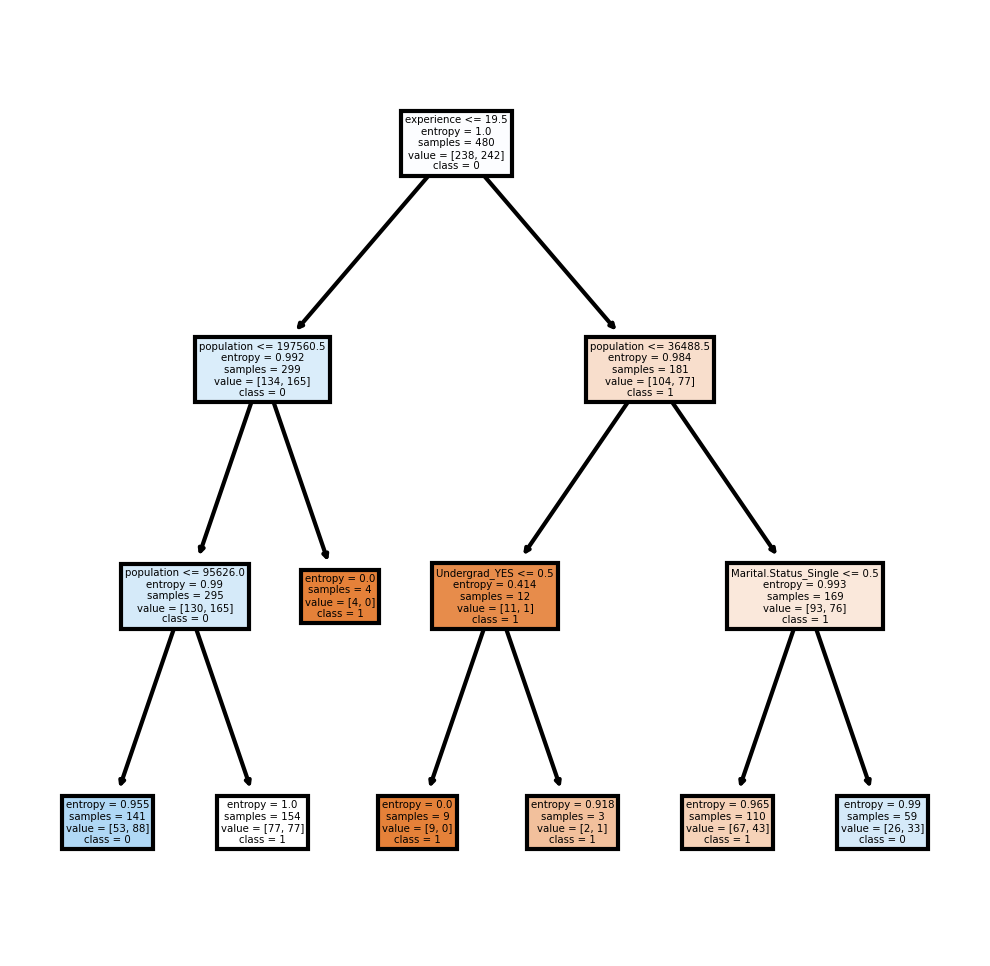

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    79
1    41
dtype: int64

In [ ]:
preds

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,39,21
1,40,20


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.49166666666666664

#Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.49166666666666664

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

-0.8701026119402988

In [ ]:
###################################################################

In [ ]:
# import some data to play with
company = pd.read_csv('Company_Data.csv')  

In [ ]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
#Creating dummy vairables for ['ShelveLoc','Urban','US'] dropping first dummy variable
company=pd.get_dummies(company,columns=['ShelveLoc','Urban','US'], drop_first=True)

In [ ]:
print(company)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Good  Shelve

In [ ]:
company.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
390,5.47,108,75,9,61,111,67,12,0,1,1,1
391,6.10,153,63,0,49,124,56,16,0,0,1,0
392,4.53,129,42,13,315,130,34,13,0,0,1,1
393,5.57,109,51,10,26,120,30,17,0,1,0,1
394,5.35,130,58,19,366,139,33,16,0,0,1,1
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1
399,9.71,134,37,0,27,120,49,16,1,0,1,1


In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
company_norm = norm_func(company.iloc[:,1:])
company_norm.tail(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
390,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,0.0,1.0,1.0,1.0
391,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,0.0,0.0,1.0,0.0
392,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,0.0,0.0,1.0,1.0
393,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,0.0,1.0
394,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,0.0,0.0,1.0,1.0
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0
399,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,0.0,1.0,1.0


In [ ]:
# Declaring features & target
X = company_norm.drop(['US_Yes'],axis=1)
y = company_norm['US_Yes']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X
pd.set_option("display.max_rows", None) 

In [ ]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,1.0
5,0.479592,0.929293,0.448276,0.983968,0.287425,0.963636,0.750,0.0,0.0,0.0
6,0.387755,0.848485,0.000000,0.070140,0.502994,0.836364,0.625,0.0,1.0,1.0
7,0.602041,0.606061,0.517241,0.831663,0.574850,0.763636,0.000,1.0,0.0,1.0
8,0.561224,0.898990,0.000000,0.196393,0.598802,0.927273,0.000,0.0,1.0,0.0
9,0.561224,0.929293,0.000000,0.242485,0.598802,0.927273,0.875,0.0,1.0,0.0


In [ ]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      0.0
7      1.0
8      0.0
9      1.0
10     1.0
11     1.0
12     0.0
13     1.0
14     1.0
15     0.0
16     0.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     1.0
25     0.0
26     1.0
27     0.0
28     1.0
29     1.0
30     0.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     0.0
37     1.0
38     0.0
39     0.0
40     0.0
41     0.0
42     0.0
43     1.0
44     1.0
45     1.0
46     1.0
47     0.0
48     0.0
49     0.0
50     1.0
51     0.0
52     1.0
53     1.0
54     1.0
55     1.0
56     0.0
57     0.0
58     1.0
59     0.0
60     1.0
61     0.0
62     1.0
63     1.0
64     1.0
65     0.0
66     0.0
67     1.0
68     1.0
69     0.0
70     1.0
71     1.0
72     0.0
73     1.0
74     1.0
75     1.0
76     1.0
77     1.0
78     1.0
79     0.0
80     1.0
81     0.0
82     1.0
83     1.0
84     0.0
85     0.0
86     0.0
87     1.0
88     1.0
89     0.0
90     0.0

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=40) 

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

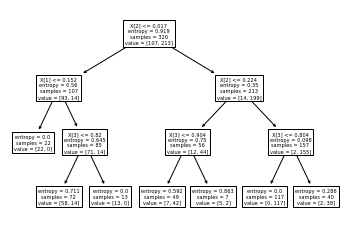

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


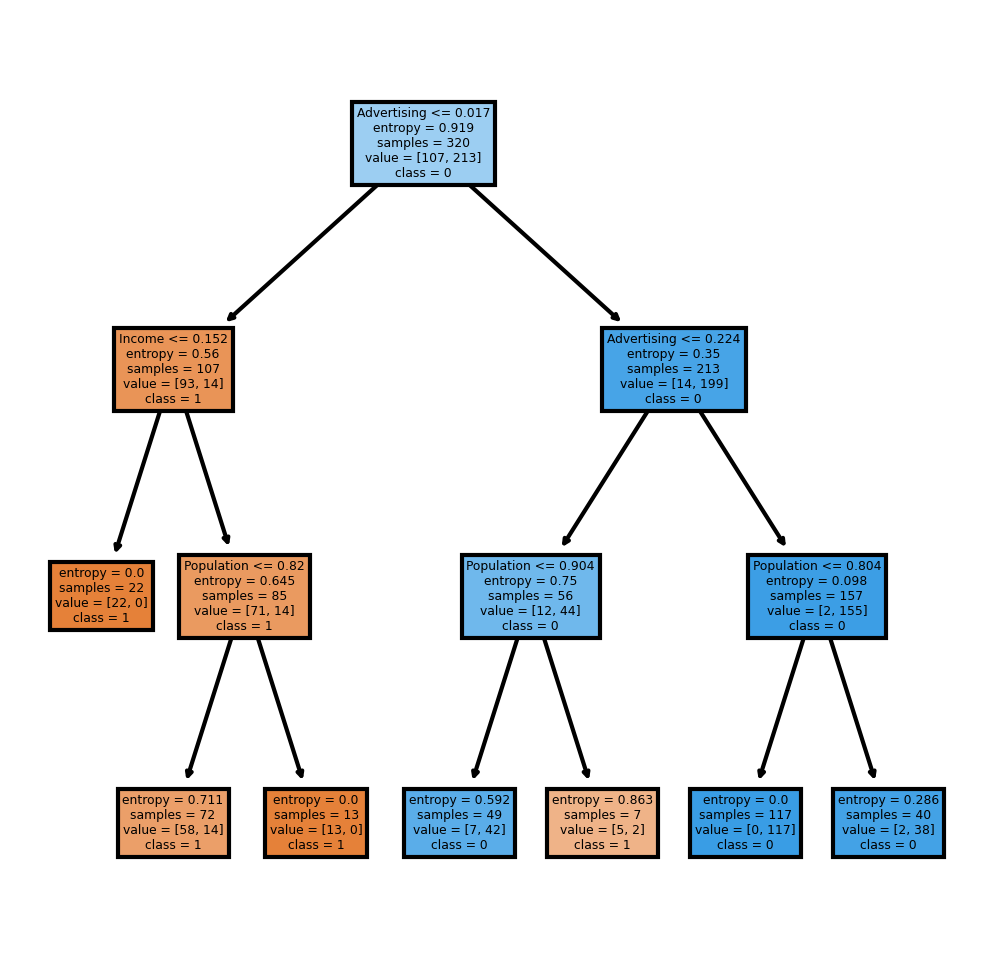

In [ ]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
model.feature_importances_ 

array([0.        , 0.02558924, 0.89992637, 0.07448439, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Advertising         0.899926
Population          0.074484
Income              0.025589
CompPrice           0.000000
Price               0.000000
Age                 0.000000
Education           0.000000
ShelveLoc_Good      0.000000
ShelveLoc_Medium    0.000000
Urban_Yes           0.000000
dtype: float64

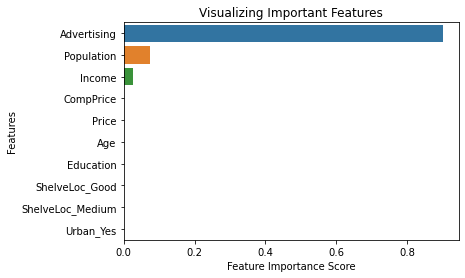

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1.0    42
0.0    38
dtype: int64

In [ ]:
preds 

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.])

In [ ]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
US_Yes,,
0.0,32,3
1.0,6,39


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.8875

In [ ]:
# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [ ]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.8875

In [ ]:
model.feature_importances_ 

array([0.        , 0.02558924, 0.89992637, 0.07448439, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
array = company.values
X = array[:,0:3]
y = array[:,3] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test) 

-1.2718451052905042